# Question 1: Simulating a 1D Random Walk with Step Bias

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Random Walk Parameters
num_steps = 1000
probability = 0.85
simulations = 5

In [37]:
# Run simulations
final_positions = []

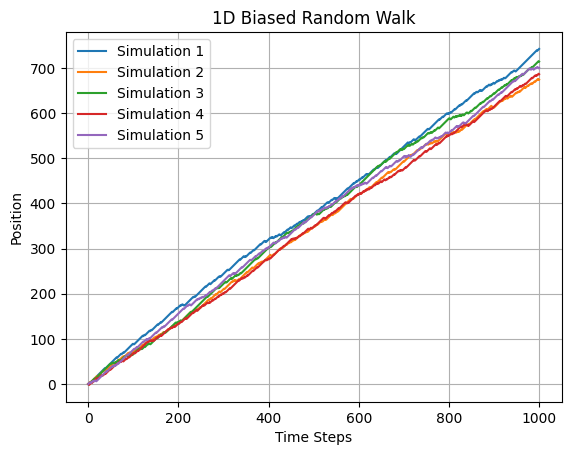

In [38]:
for x in range(simulations):
    position = 0
    positions = [position]
    for i in range(num_steps):
        step = np.random.choice([1, -1], p=[probability, 1-probability])
        position += step
        positions.append(position)
    final_positions.append(position)
    plt.plot(positions, label=f'Simulation {x+1}')

# Plotting
plt.title('1D Biased Random Walk')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

In [39]:
# Analysis
mean_pos = np.mean(final_positions)
std_pos = np.std(final_positions)

print(f"Final positions: {final_positions}")
print(f"Mean final position: {mean_pos:.2f}")
print(f"Standard deviation of final positions: {std_pos:.2f}")

Final positions: [742, 674, 714, 686, 700]
Mean final position: 703.20
Standard deviation of final positions: 23.58


## Interpretation
The final positions after 1000 steps vary across 5 simulations; `[742, 674, 714, 686, 700]`. They vary due to the randomness of the walks or simulations. However, these values concentrate a round a mean of 703.20 and a standard deviation of 23.58. The positive mean is consistent with a trend that is moving towards the right direction aligning with the higher probability of +0.85. The relatively lower standard deviation indicates that the final positions are closely clustered, confirming the stability in the simulations of the particle due to the high probability of moving right.

# Question 2: Comparing 1D Random Walks with and without Drift

In [59]:
# Parameters
num_steps = 1000

In [60]:
# Function to simulate random walk
def random_walk(num_steps, probability):
    position = 0
    positions = [position]
    for _ in range(num_steps):
        position += np.random.choice([1, -1], p=[probability, 1-probability])
        positions.append(position)
    return positions

In [61]:
# Simulate random walks
walk_with_drift = random_walk(num_steps, probability=0.7)
walk_with_no_drift = random_walk(num_steps, probability=0.5)

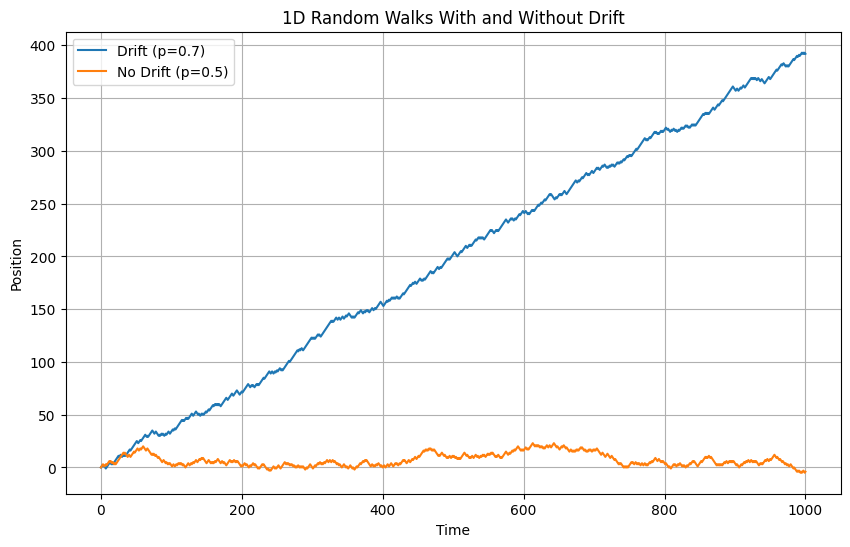

In [62]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(walk_with_drift, label='Drift (p=0.7)')
plt.plot(walk_with_no_drift, label='No Drift (p=0.5)')
plt.title('1D Random Walks With and Without Drift')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

In [64]:
# Mean and Standard Deviation
final_positions = [walk_with_drift[-1], walk_with_no_drift[-1]]
mean = np.mean(final_positions)
std = np.std(final_positions)

print(f"Final position with drift: {walk_with_drift[-1]}")
print(f"Final position without drift: {walk_with_no_drift[-1]}")
print(f"Mean: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")

Final position with drift: 392
Final position without drift: -4
Mean: 194.00
Standard deviation: 198.00


## Interpretation
The final position with drift is 392, indicating a substantial drift toward the right (probability = 0.7). The particle consistently drifts positivel in the right direction because `prob_1` is greater than `prob_2` which drifts negatively towards the left direction. This results in a significant positive final position.

The final position with no drift (-4) indicates that the particle has no directional preference. Therefore, it randomly fluctuates near zero around the origin. This small final position of -4 suggests typical random fluctuations with no significant bias.

The positive mean of 194.00 indicates that on average, the particles with drift significantly move farther in the right direction compared to unbiased particles. The large standard deviation of `198.00` indicates a significant variability between particle A (with drift) and particle B (without drift). This difference can be due to consistent movement of particle A in one preferred direction as particle B, the unbiased particle fluctuates around the origin position.


# Question 3: Simulating a 2D Random Walk (Unbiased)

In [84]:
# Corrected and finalized complete simulation for Question 3:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
steps = 500
simulations = 10


In [86]:
# Unbiased 2D random walk
def random_walk_2D(steps):
    x, y = [0], [0]
    for _ in range(steps):
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up':
            y.append(y[-1] + 1)
            x.append(x[-1])
        elif direction == 'down':
            y.append(y[-1] - 1)
            x.append(x[-1])
        elif direction == 'left':
            x.append(x[-1] - 1)
            y.append(y[-1])
        elif direction == 'right':
            y.append(y[-1])
            x.append(x[-1] + 1)
    return x, y

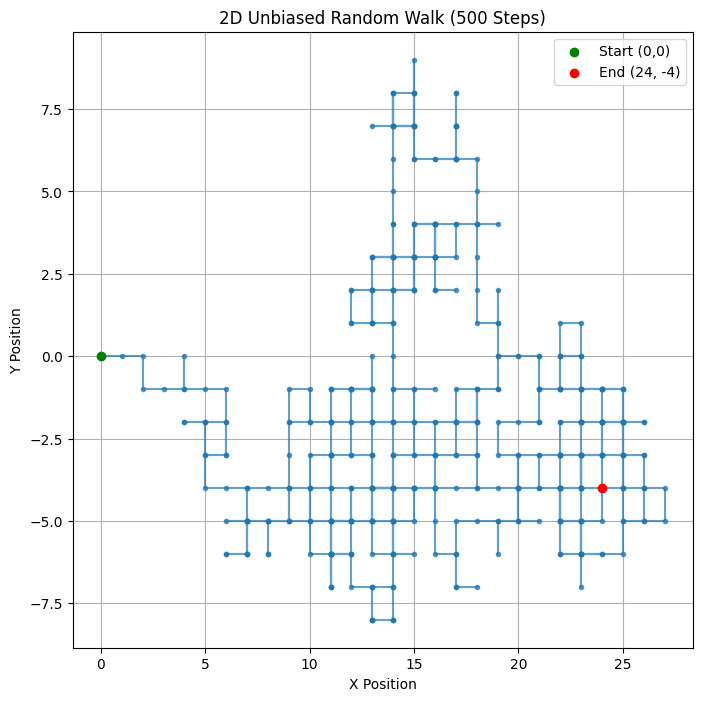

In [87]:
# Single simulation
x, y = random_walk_2D(500)

plt.figure(figsize=(8,8))
plt.plot(x, y, linestyle="-", marker=".", alpha=0.7)
plt.scatter(0, 0, color="green", label="Start (0,0)", zorder=5)
plt.scatter(x[-1], y[-1], color="red", label=f"End ({x[-1]}, {y[-1]})", zorder=3)
plt.title('2D Unbiased Random Walk (500 Steps)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid()
plt.legend()
plt.show()

In [88]:
# Multiple simulations
distances = []
for _ in range(10):
    x_sim, y_sim = random_walk_2D(500)
    distance = np.sqrt(x_sim[-1]**2 + y_sim[-1]**2)
    distances.append(distance)

In [89]:
mean_distance = np.mean(distances) #average distance
std_distance = np.std(distances) # standard deviation of the distance

final_position = (x[-1], y[-1])
final_distance = np.sqrt(x[-1]**2 + y[-1]**2)

final_pos_single, final_distance, mean_distance, std_distance

((1, 1), 24.331050121192877, 20.984849304563095, 7.143955463521436)

#Interpretation

In the 2D Random Walk, we observe:

- Mosquito finishes at a position close to origin `(1, 1)` after 500 steps. This represents a short distance of 24.33 units from the origin.
- The average distance, `20.98` indicates that over 10 simulations, mosquito tend to wander quite far from the origin (initial point) after 500 steps. This can be due to cumulative random walk.
- The relatively high standard deviation of `7.14` indicates a variability in the final distances across the simulations. This confirms the unpredictable nature of the unbiased random movement of the mosquito

#Question 4: Comparing 2D Random Walks with Bias vs No Bias

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
steps = 500
simulations = 10


In [142]:
def random_walk_2D(steps, biased=True):
    x, y = [0], [0]
    directions = ['E', 'W', 'N', 'S']
    probabilities = [0.4, 0.2, 0.2, 0.2] if biased else [0.25]*4

    for _ in range(steps):
        move = np.random.choice(directions, p=probabilities if biased else [0.25]*4)
        if move == 'E':
            x.append(x[-1] + 1)
            y.append(y[-1])
        elif move == 'W':
            x.append(x[-1] - 1)
            y.append(y[-1])
        elif move == 'N':
            y.append(y[-1] + 1)
            x.append(x[-1])
        else:  # South
            x.append(x[-1])
            y.append(y[-1] - 1)
    return x, y

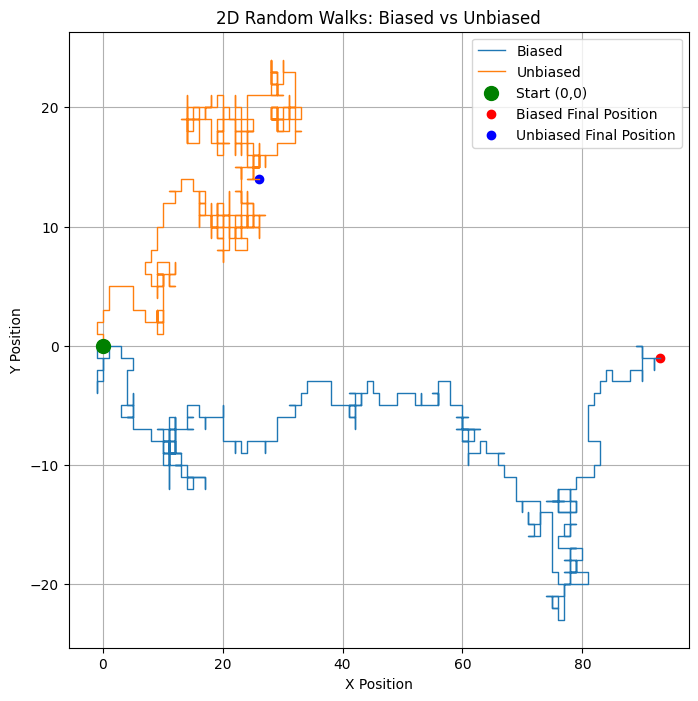

In [146]:
# Plot single biased vs unbiased walk
xb, yb = random_walk_2D(steps, biased=True)
xu, yu = random_walk_2D(steps, biased=False)

plt.figure(figsize=(8,8))
plt.plot(xb, yb, label='Biased', linewidth=1)
plt.plot(xu, yu, label='Unbiased', linewidth=1)
plt.scatter(0, 0, color='green', s=100, label='Start (0,0)', zorder=5)
plt.scatter(xb[-1], yb[-1], color='red', label='Biased Final Position')
plt.scatter(xu[-1], yu[-1], color='blue', label='Unbiased Final Position')
plt.title('2D Random Walks: Biased vs Unbiased')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid()
plt.show()

In [149]:
# Multiple simulations for analysis
distances_biased = []
distances_unbiased = []

In [150]:
for _ in range(simulations):
    xb, yb = random_walk_2D(steps, biased=True)
    xu, yu = random_walk_2D(steps, biased=False)

    dist_biased = np.sqrt(xb[-1]**2 + yb[-1]**2)
    dist_unbiased = np.sqrt(xu[-1]**2 + yu[-1]**2)

    distances_biased.append(dist_biased)
    distances_unbiased.append(dist_unbiased)

In [151]:
mean_biased = np.mean(distances_biased)
std_biased = np.std(distances_biased)

mean_unbiased = np.mean(distances_unbiased)
std_unbiased = np.std(distances_unbiased)

print(f"Biased Walk - Final Position: ({xb[-1]}, {yb[-1]}), Distance: {dist_biased:.2f}")
print(f"Unbiased Walk - Final Position: ({xu[-1]}, {yu[-1]}), Distance: {dist_unbiased:.2f}")
print(f"Average distance (biased): {mean_biased:.2f}, Std Dev: {std_biased:.2f}")
print(f"Average distance (unbiased): {mean_unbiased:.2f}, Std Dev: {std_unbiased:.2f}")

Biased Walk - Final Position: (85, -11), Distance: 85.71
Unbiased Walk - Final Position: (-4, 6), Distance: 7.21
Average distance (biased): 109.55, Std Dev: 15.57
Average distance (unbiased): 13.45, Std Dev: 7.58


## Interpretation
### 1. Biased Walk
- The final position for biased walk is `(85, -11)` and a distance of `85.71 units` from the origin. With repeated simulations, this eastward bias results in a significantly larger average distance `109.55 units` from the starting point.

### 2. Unbiased Walk
- The person's average final distance is `13.45 units` which is relatively small. With no biasness, the person moves closer to the origin due to random fluctuations averaging out over various directions.

#### **Why does the biased random walk drift to the east?**
- The biased random walk drifts east because there's a higher probability (40%) of moving east compared to other directions (20% each for west, north, south).
- When these probabilities accumulate over many steps, the person is caused to consistently move further toward the east direction.
- The directional preference ensures that the predominant eastward movement results in significant net displacement.

#### **How does drift affect the standard deviation of the final position?**
- The drift increases the standard deviation significantly. This is due to consistent directional (eastward) push that affects the range of possible final positions by expansion.
- Although the unbiased walk leads to clustering of positions around the origin (low variability), fluctuation causes systematic displacement and higher variability.
- The person moves consistently in one predominant direction, leading to increased variation across simulations. Hence, a higher standard deviation `15.57` for biased and `7.58` for unbiased.

#### **What real-world phenomena could this simulation represent?**

1. Biased random walk simulates phenomena such as ocean currents, wind drift, and animal migration. These scenarios are caused by external stimuli.
2. Unbiased random walk stimulates scenarios such as gas molecules dispersing uniformly without directional influence and financial markets.